# <p style="font-family:newtimeroman;color:#182F2F;font-size:200%;text-align:center;border-radius:10px 10px;">CUSTOMER ANALYSIS</p>

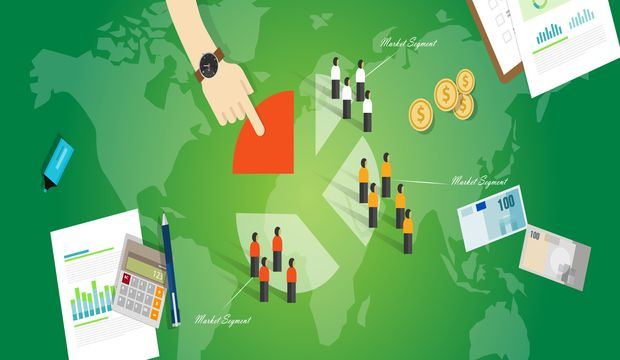




## PROBLEM STATEMENT
A well known company with numerous products needs to analyze their customer behavior and
classify them whether they will accept the campaigns held by the company. Also, cluster the
customers into different segments.

## GOALS


The objective of this exercise is to build a model, using historical data Focus on all steps of data
science (EDA, data processing, model, evaluation, charts)
1. Highlight any trend in data, deep insight, novel steps that you take
2. Highlight next steps and improvements.
3. Apply classification and clustering machine learning algorithms and evaluate it.

###  Data Dictionary

#### People

● ID: Customer's unique identifier.

● Year_Birth: Customer's birth year.

● Education: Customer's education level.

● Marital_Status: Customer's marital status.

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise


#### Products

● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years


#### Promotion

● NumDealsPurchases: Number of purchases made with a discount
    
● AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    
● AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    
● AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    
● AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    
● AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    
● Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    


#### Place

● NumWebPurchases: Number of purchases made through the company’s website
    
● NumCatalogPurchases: Number of purchases made using a catalogue
    
● NumStorePurchases: Number of purchases made directly in stores
    
● NumWebVisitsMonth: Number of visits to company’s website in the last month
    

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">1.Importing Libraries</p>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">2.Loading Dataset</p>

In [ ]:
#Load training dataset
df_train=pd.read_csv("C:\\Users\\hp\\Downloads\\customer_train.csv")
df_train.head()

In [ ]:
#Load testing dataset
df_test=pd.read_csv("C:\\Users\\hp\\Downloads\\customer_test.csv")
df_test.head()

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">3.Exploring Dataset</p>

In [ ]:
#dropping the repeated columns from both train and test dataset
df_train.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_train.head(2)

In [ ]:
df_test.head(2)

In [ ]:
print('df_train shape:',df_train.shape)
print('df_test shape:',df_test.shape)

In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_train=df_train.dropna()
df_train.isnull().sum()

In [ ]:
df_test=df_test.dropna()
df_test.isnull().sum()

In [ ]:
df_train.nunique()

In [ ]:
df_test.nunique()

#### Checking on Z_CostContact & Z_Revenue as they seem to have a single value

In [ ]:
print(df_train.Z_CostContact.unique())
print(df_test.Z_CostContact.unique())


In [ ]:
print(df_train.Z_Revenue.unique())
print(df_test.Z_Revenue.unique())

#### Since they have single values of 3 & 11 it will not contribute much to the model creation.So they are dropped from both training and testing dataset.

In [ ]:
df_train.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)
df_test.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [ ]:
print('df_train.shape',df_train.shape)
print('df_test.shape',df_test.shape)

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">4.Feature Engineering</p>

In [ ]:
#studying the feature 'Dt_Customer'
df_train.Dt_Customer

In [ ]:
#Changing datatype for both train and test data

df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'],format='mixed')
print(df_train['Dt_Customer'].max())


df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'],format='mixed')
print(df_test['Dt_Customer'].max())


In [ ]:
#for train dataset
dates = []
for i in df_train['Dt_Customer']:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print('The newest customer enrolment date:',max(dates))
print('The oldest customer enrolment date:',min(dates))

In [ ]:
#for test dataset
dates_test = []
for i in df_test['Dt_Customer']:
    i = i.date()
    dates_test.append(i)
#Dates of the newest and oldest recorded customer
print('The newest customer enrolment date:',max(dates_test))
print('The oldest customer enrolment date:',min(dates_test))

In [ ]:
#Creating a feature 'Customer_For'
days = []
d1=max(dates)
for i in dates:
    delta=d1 - i
    days.append(delta)
df_train['Customer_For'] = days
df_train['Customer_For'] = pd.to_numeric(df_train['Customer_For'],errors='coerce')


In [ ]:
df_train.head()

In [ ]:
#Creating a feature 'Customer_For' testing data
days_test = []
d1_test=max(dates_test)
for i in dates_test:
    delta_test=d1_test - i
    days_test.append(delta_test)
df_test['Customer_For'] = days_test
df_test['Customer_For'] = pd.to_numeric(df_test['Customer_For'],errors='coerce')


In [ ]:
df_test.head()

#### This dataset contains the data of customers between 2012 & 2014.

In [ ]:
#Creating Age Column
df_train['Age']=2023-df_train.Year_Birth

#Total spending on various products
df_train['Spent']=df_train['MntCoke']+df_train['MntFruits']+df_train['MntMeatProducts']+df_train['MntFishProducts']+df_train['MntSweetProducts']+df_train['MntGoldProds']
                    


#Changing the Indonesian words to English
df_train['Marital_Status']=df_train['Marital_Status'].replace({'Lajang':'Bachelor',
                                                              'Bertunangan':'Engaged',
                                                              'Menikah':'Married',
                                                              'Cerai':'Divorced',
                                                              'Janda':'Widow',
                                                              'Duda':'Widower'})



#Alone or Together
df_train['Living_With']=df_train['Marital_Status'].replace({'Bachelor':'Alone',
                                                            'Engaged':'Partner',
                                                            'Married':'Partner',
                                                            'Divorced':'Alone',
                                                            'Widow':'Alone',
                                                            'Widower':'Alone'})

#Total Children in the house
df_train['Children']=df_train['Kidhome']+df_train['Teenhome']

#Total members in the house
df_train['Family_Size']=df_train['Living_With'].replace({'Alone':1,'Partner':2}) + df_train['Children']


#Column showing parent or not
df_train['Is_Parent']=np.where(df_train.Children> 0, 1 , 0)

#Changing the Indonesian representations to English
df_train['Education']=df_train['Education'].replace({'S1':'Bachelors',
                                                     'S2':'Masters',
                                                     'S3':'Doctorate',
                                                     'SMA':'Senior High',
                                                     'D3':'Diploma'})



#Segmenting education levels in three groups
df_train['Education_Levels']=df_train['Education'].replace({'Bachelors':'Graduates',
                                                            'Masters':'PG',
                                                            'Doctorate':'PG',
                                                            'Senior High':'UG',
                                                            'Diploma':'UG'})



In [ ]:
#Repeating the same for test dataset

#Creating Age Column
df_test['Age']=2023-df_test.Year_Birth


#Total spending on various products
df_test['Spent']=df_test['MntCoke']+df_test['MntFruits']+df_test['MntMeatProducts']+df_test['MntFishProducts']+df_test['MntSweetProducts']+df_test['MntGoldProds']
                    


#Changing the Indonesian words to English
df_test['Marital_Status']=df_test['Marital_Status'].replace({'Lajang':'Bachelor',
                                                              'Bertunangan':'Engaged',
                                                              'Menikah':'Married',
                                                              'Cerai':'Divorced',
                                                              'Janda':'Widow',
                                                              'Duda':'Widower'})



#Alone or Together
df_test['Living_With']=df_test['Marital_Status'].replace({'Bachelor':'Alone',
                                                            'Engaged':'Partner',
                                                            'Married':'Partner',
                                                            'Divorced':'Alone',
                                                            'Widow':'Alone',
                                                            'Widower':'Alone'})


#Total Children in the house
df_test['Children']=df_test['Kidhome'] + df_test['Teenhome']


#Total members in the house
df_test['Family_Size']=df_test['Living_With'].replace({'Alone':1,'Partner':2}) + df_test['Children']


#Column showing parent or not
df_test['Is_Parent']=np.where(df_test.Children> 0, 1 , 0)


#Changing the Indonesian representations to English
df_test['Education']=df_test['Education'].replace({'S1':'Bachelors',
                                                     'S2':'Masters',
                                                     'S3':'Doctorate',
                                                     'SMA':'Senior High',
                                                     'D3':'Diploma'})



#Segmenting education levels in three groups
df_test['Education_Levels']=df_test['Education'].replace({'Bachelors':'Graduates',
                                                            'Masters':'PG',
                                                            'Doctorate':'PG',
                                                            'Senior High':'UG',
                                                            'Diploma':'UG'})


In [ ]:
df_train.head()

In [ ]:
df_test.head()

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">5.Outlier Removal</p>

In [ ]:
df_train.describe()

#### Income and age features have a wide range of value difference from max value and 75 percentile. 

In [ ]:
#For the case of Age the outliers are removed by,

df_train=df_train[df_train['Age']<85]
df_train.shape


In [ ]:
#For the case of Income the outliers are removed by,

df_train=df_train[df_train['Income']<102527080.00000003]
df_train.shape


In [ ]:
print(df_train.Income.quantile(0.6))
print(df_train.Income.quantile(0.65))
print(df_train.Income.quantile(0.7))
print(df_train.Income.quantile(0.75))
print(df_train.Income.quantile(0.8))
print(df_train.Income.quantile(0.85))
print(df_train.Income.quantile(0.9))
print(df_train.Income.quantile(0.95))
print(df_train.Income.quantile(0.991))
print(df_train.Income.quantile(0.994))
print(df_train.Income.quantile(0.998))
print(df_train.Income.quantile(1))

In [ ]:
df_train.describe()

In [ ]:
df_train.shape

In [ ]:
df_test.describe()

In [ ]:
df_test.Age.max()

#### Test data Age column doesn't have an outlier value.

In [ ]:
#For the case of test data Income the outliers are removed by,
df_test=df_test[df_test['Income']<113734000.0]
df_test.shape


In [ ]:
print(df_test.Income.quantile(0.7))
print(df_test.Income.quantile(0.75))
print(df_test.Income.quantile(0.8))
print(df_test.Income.quantile(0.85))
print(df_test.Income.quantile(0.9))
print(df_test.Income.quantile(1))

In [ ]:
df_test.describe()

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">6.Exploratory Data Analysis</p>

### 1.analysing Recency Details

In [ ]:
#analysing Recency column:
print('training dataset max value:',df_train.Recency.max())
print('testing dataset max value:',df_test.Recency.max())
print('training dataset min value:',df_train.Recency.min())
print('testing dataset min value:',df_test.Recency.min())


### 2.Analysing the Campaign Details

In [ ]:
cmp_df=df_train['AcceptedCmp1'],df_train['AcceptedCmp2'],df_train['AcceptedCmp3'],df_train['AcceptedCmp4'],df_train['AcceptedCmp5']
for i in cmp_df:
    j=i.value_counts()
    print(j)

### 3.Analysing Purchase through different places

In [ ]:
df_train.columns

In [ ]:
purchase_df=df_train['NumDealsPurchases'],df_train['NumWebPurchases'],df_train['NumCatalogPurchases'],df_train['NumWebVisitsMonth'],df_train['NumStorePurchases']
k1=[]
for i in purchase_df:
    k=i.value_counts()
    print(k.head(10))


### 4.EDA Based On Education

#### PIE Chart representation of customer count based on Education.

In [ ]:
Cust_Count_Edu=df_train.groupby('Education').count()['ID']
Cust_Count_Edu

In [ ]:
label_Edu=df_train.groupby('Education').count()['ID'].index
label_Edu

In [ ]:
plt.axis('Equal')
plt.pie(Cust_Count_Edu,labels=label_Edu, shadow=True,autopct='%1.2f%%',radius=1,explode=[0.2,0.2,0.2,0.2,0.2])
plt.show()

#### Average spent of customers on each product grouped under Education.

In [ ]:
Coke_Spent_Edu=df_train.groupby('Education')['MntCoke'].mean()
Coke_Spent_Edu

In [ ]:
Fruits_Spent_Edu=df_train.groupby('Education')['MntFruits'].mean()
Fruits_Spent_Edu

In [ ]:
Meat_Spent_Edu=df_train.groupby('Education')['MntMeatProducts'].mean()
Meat_Spent_Edu

In [ ]:
Fish_Spent_Edu=df_train.groupby('Education')['MntFishProducts'].mean()
Fish_Spent_Edu

In [ ]:
Sweet_Spent_Edu=df_train.groupby('Education')['MntSweetProducts'].mean()
Sweet_Spent_Edu

In [ ]:
Gold_Spent_Edu=df_train.groupby('Education')['MntGoldProds'].mean()
Gold_Spent_Edu

In [ ]:
xpos_Edu=np.arange(len(label_Edu))
xpos_Edu

#### BAR PLOT OF AMOUNT SPENT ON ITEMS BASED ON EDUCATION

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(x=xpos_Edu-0.45,height=Coke_Spent_Edu,width=0.15,label='Coke',color='violet')
plt.bar(x=xpos_Edu-0.3,height=Fruits_Spent_Edu,width=0.15,label='fruit')
plt.bar(x=xpos_Edu-0.15,height=Meat_Spent_Edu,width=0.15,label='MeatProducts',color='pink')
plt.bar(x=xpos_Edu,height=Fish_Spent_Edu,width=0.15,label='FishProducts',color='yellow')
plt.bar(x=xpos_Edu+0.15,height=Sweet_Spent_Edu,width=0.15,label='SweetProducts',color='orange')
plt.bar(x=xpos_Edu+0.3,height=Gold_Spent_Edu,width=0.15,label='GoldProducts',color='brown')

plt.xticks(xpos_Edu,label_Edu)
plt.ylabel('Average spent')
plt.title('Amount Spent on Items')
plt.legend(loc='upper right',shadow=True,fontsize='small')




## Observation:

Based on education customers spent more money on buying coke.Bachelors are the top buyers of meat products based on this dataset.customers spent more on gold after meat products.Spending on sweets and fruits are equal for all the levels of education.

### 5.EDA Based on No.of Kids

#### PIE Chart representation of customer count based on No. of kids

In [ ]:
Cust_Count_Kids=df_train.groupby('Kidhome').count()['ID']
Cust_Count_Kids

In [ ]:
label_Kids=df_train.groupby('Kidhome').count()['ID'].index
label_Kids

In [ ]:
plt.axis('equal')
plt.pie(Cust_Count_Kids,labels=label_Kids,shadow=True,autopct='%1.2f%%',radius=2,explode=[0.1,0.2,0.3])
plt.show()

#### Average spent on products based on kids home

In [ ]:
Coke_Spent_Kids=df_train.groupby('Kidhome')['MntCoke'].mean()
Coke_Spent_Kids

In [ ]:
Fruits_Spent_Kids=df_train.groupby('Kidhome')['MntFruits'].mean()
Fruits_Spent_Kids

In [ ]:
Meat_Spent_Kids=df_train.groupby('Kidhome')['MntMeatProducts'].mean()
Meat_Spent_Kids

In [ ]:
Fish_Spent_Kids=df_train.groupby('Kidhome')['MntFishProducts'].mean()
Fish_Spent_Kids

In [ ]:
Sweet_Spent_Kids=df_train.groupby('Kidhome')['MntSweetProducts'].mean()
Sweet_Spent_Kids

In [ ]:
Gold_Spent_Kids=df_train.groupby('Kidhome')['MntGoldProds'].mean()
Gold_Spent_Kids

In [ ]:
xpos_Kids=np.arange(len(label_Kids))
xpos_Kids

#### BAR PLOT OF AMOUNT SPENT ON ITEMS BASED ON KIDS HOME

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(x=xpos_Kids-0.45,height=Coke_Spent_Kids,width=0.15,label='Coke',color='violet')
plt.bar(x=xpos_Kids-0.3,height=Fruits_Spent_Kids,width=0.15,label='fruit')
plt.bar(x=xpos_Kids-0.15,height=Meat_Spent_Kids,width=0.15,label='MeatProducts',color='pink')
plt.bar(x=xpos_Kids,height=Fish_Spent_Kids,width=0.15,label='FishProducts',color='yellow')
plt.bar(x=xpos_Kids+0.15,height=Sweet_Spent_Kids,width=0.15,label='SweetProducts',color='orange')
plt.bar(x=xpos_Kids+0.3,height=Gold_Spent_Kids,width=0.15,label='GoldProducts',color='brown')

plt.xticks(xpos_Kids,label_Kids)
plt.ylabel('Average spent')
plt.title('Amount Spent on Items')
plt.legend(loc='upper right',shadow=True,fontsize='small')



## Observations:

### 6.EDA based on Marital Status

In [ ]:
Cust_Count_MS=df_train.groupby('Marital_Status').count()['ID']
Cust_Count_MS

In [ ]:
label_MS=df_train.groupby('Marital_Status').count()['ID'].index
label_MS

#### PIE Chart representation of customer count based on Marital Status

In [ ]:
plt.axis('equal')
plt.pie(Cust_Count_MS,labels=label_MS,shadow=True,autopct='%1.2f%%',radius=2,explode=[0.2,0.2,0.2,0.2,0.1,0.1])
plt.show()

#### Average spent on products based on Marital Status

In [ ]:
Coke_Spent_MS=df_train.groupby('Marital_Status')['MntCoke'].mean()
Coke_Spent_MS

In [ ]:
Fruits_Spent_MS=df_train.groupby('Marital_Status')['MntFruits'].mean()
Fruits_Spent_MS

In [ ]:
Meat_Spent_MS=df_train.groupby('Marital_Status')['MntMeatProducts'].mean()
Meat_Spent_MS

In [ ]:
Fish_Spent_MS=df_train.groupby('Marital_Status')['MntFishProducts'].mean()
Fish_Spent_MS

In [ ]:
Sweet_Spent_MS=df_train.groupby('Marital_Status')['MntSweetProducts'].mean()
Sweet_Spent_MS

In [ ]:
Gold_Spent_MS=df_train.groupby('Marital_Status')['MntGoldProds'].mean()
Gold_Spent_MS

In [ ]:
xpos_MS=np.arange(len(label_MS))
xpos_MS

#### BAR PLOT OF AMOUNT SPENT ON ITEMS BASED ON MARITAL STATUS.

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(x=xpos_MS-0.45,height=Coke_Spent_MS,width=0.15,label='Coke',color='violet')
plt.bar(x=xpos_MS-0.3,height=Fruits_Spent_MS,width=0.15,label='fruit')
plt.bar(x=xpos_MS-0.15,height=Meat_Spent_MS,width=0.15,label='MeatProducts',color='pink')
plt.bar(x=xpos_MS,height=Fish_Spent_MS,width=0.15,label='FishProducts',color='yellow')
plt.bar(x=xpos_MS+0.15,height=Sweet_Spent_MS,width=0.15,label='SweetProducts',color='orange')
plt.bar(x=xpos_MS+0.3,height=Gold_Spent_MS,width=0.15,label='GoldProducts',color='brown')

plt.xticks(xpos_MS,label_MS)
plt.ylabel('Average spent')
plt.title('Amount Spent on Items')
plt.legend(loc='upper right',shadow=True,fontsize='small')


### Observations:

Coke is the top consumed product irrespective of the married status.Meat comes after that.All other products are consumed moderately.

## 7.Age Analysis

In [ ]:
Cust_Count_Age=df_train.groupby('Age').count()['ID']
Cust_Count_Age

In [ ]:
label_Age=df_train.groupby('Age').count()['ID'].index
label_Age

In [ ]:
xpos_Age=np.arange(len(label_Age))
xpos_Age

#### AGE DISTRIBUTION

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(xpos_Age,height=Cust_Count_Age,width=0.15,label='Total Poeple with Age',color='violet')

plt.xticks(xpos_Age,label_Age)
plt.xlabel('Age')
plt.ylabel('No.of People')
plt.title('Customers Age Distribution')
plt.legend(loc='best',shadow=True,fontsize='large')

### Observations:

It is visible from the chart that most of the customers comes under the age of 35 & 75. 

## 8.Income and Kids home Correlation

In [ ]:
sns.displot(x=df_train['Income'],y=df_train['Kidhome'])

In [ ]:
df_train.groupby('Kidhome')['Income'].mean()

## 9.Correlation between Income and Education

In [ ]:
sns.displot(data=df_train,x='Education',y='Income')

## 10.Correlation between All Features

In [ ]:
# A Pairplot
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
sns.pairplot(df_train[To_Plot], hue= "Is_Parent")
plt.show()

In [ ]:
# Correlation Matrix
df_numeric=df_train.drop(['Education','Marital_Status','Living_With','Education_Levels'],axis=1)
corr=df_numeric.corr()
corr
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='copper', annot=True)
plt.show()

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">7.Data Preprocessing</p>

### TRAINING DATASET

In [ ]:
df_train2=df_train.copy()
df_train2.shape

In [ ]:
#Removing some columns before encoding
df_train2=df_train2.drop(['ID','Living_With','Dt_Customer','Education_Levels','Complain','Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Customer_For','NumWebVisitsMonth'],axis=1)

In [ ]:
df_train2.head()

### 1.ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

s = (df_train2.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
   len(object_cols))

In [ ]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()
for i in object_cols:
    df_train2[i]=df_train2[[i]].apply(labenc.fit_transform)
    
df_train2.head()

In [ ]:
df_train2.shape

### 2.SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaled_data = scaler.fit_transform(df_train2)
scaled_data

In [ ]:
scaled_df=pd.DataFrame(scaled_data)
scaled_df.columns=df_train2.columns
scaled_df

In [ ]:
df_train2.head()

### TESTING DATASET

In [ ]:
df_test2=df_test.copy()
df_test2.shape

In [ ]:
#Removing some columns:
df_test2=df_test2.drop(['ID','Living_With','Dt_Customer','Education_Levels','Complain','Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Customer_For','NumWebVisitsMonth'],axis=1)

In [ ]:
df_test2.head()

### 1.ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

s_test = (df_test2.dtypes == 'object')
object_cols_test = list(s_test[s_test].index)
print("Categorical variables:")
print(object_cols_test)
print('No. of. categorical features: ',
   len(object_cols_test))

In [ ]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc_test=LabelEncoder()
for i in object_cols_test:
    df_test2[i]=df_test2[[i]].apply(labenc_test.fit_transform)
    
df_test2.head()

In [ ]:
df_test2.shape

### 2.SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler_test = StandardScaler()


scaled_data_test = scaler_test.fit_transform(df_test2)
scaled_data_test

In [ ]:
scaled_df_test=pd.DataFrame(scaled_data_test)
scaled_df_test.columns=df_test2.columns
scaled_df_test

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">8.Clustering</p>

## TRAINING DATASET

## 1.KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)

score = silhouette_score(scaled_df, kmeans.labels_, metric='euclidean')
score

In [ ]:
#### To improve KMeans score adding 'NumWebVisitsMonth' column to the dataset
df_train3=df_train.copy()
#Removing some columns before encoding
df_train3=df_train3.drop(['ID','Living_With','Dt_Customer','Education_Levels','Complain','Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Customer_For'],axis=1)
df_train3

In [ ]:
from sklearn.preprocessing import LabelEncoder

s_df3 = (df_train3.dtypes == 'object')
object_cols_df3 = list(s_df3[s_df3].index)
print("Categorical variables:")
print(object_cols_df3)
print('No. of. categorical features: ',
   len(object_cols_df3))

In [ ]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc_df3=LabelEncoder()
for i in object_cols_df3:
    df_train3[i]=df_train3[[i]].apply(labenc_df3.fit_transform)
    
df_train3.head()

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler_df3 = StandardScaler()


scaled_data_df3 = scaler_df3.fit_transform(df_train3)
scaled_data_df3

In [ ]:
scaled_df3=pd.DataFrame(scaled_data_df3)
scaled_df3.columns=df_train3.columns
scaled_df3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df3)

score = silhouette_score(scaled_df3, kmeans.labels_, metric='euclidean')
score

#### What I have done here is when the 'NumWebVisitsMonth' column is removed from the dataset the score of KMeans model were 0.13774443237728684.To improve this score I included the above mentioned column and obtained a score of 0.1516177804142579

## 2.Dimensionality Reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit_transform(scaled_df)

In [ ]:
pca_df=pd.DataFrame(pca.fit_transform(scaled_df),columns=(['col1','col2','col3']))
pca_df

In [ ]:
# 3D visualization of PCA data
x=pca_df['col1']
y=pca_df['col2']
z=pca_df['col3']
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='maroon',marker='o')
ax.set_title('A 3D projection')
plt.show()

In [ ]:
#Silhouette score using pca dataset
score = silhouette_score(pca_df, kmeans.labels_, metric='euclidean')
score

### Elbow Plot

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M=KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()


In [ ]:
distortions = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()    

## Observation:
Distortion score value does'nt change after k=4. So we choose the value for k as 4.

## 3.Agglomerative Clustering

In [ ]:
AC=AgglomerativeClustering(n_clusters=4)
yhat_AC=AC.fit_predict(pca_df)
pca_df['Clusters'] = yhat_AC
df_train2['Clusters']=yhat_AC
df_train2

In [ ]:
#3d plot with cluster 
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=pca_df['Clusters'],marker='o',cmap='spring')
ax.set_title('The Cluster Plot')
plt.show()

### EDA on Clusters

#### DISTRIBUTION OF CLUSTERS

In [ ]:
pl=sns.countplot(x=df_train2['Clusters'],palette=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"])
pl.set_title('Distribution of Clusters')
plt.show()

## Observations:
Most number of customers comes under cluster 0
then comes cluster 1 and cluster 2 & cluster 3 have relatively equal number of customers.

#### CORRELATION OF INCOME AND SPENDING WITH CLUSTERS AS HUE

In [ ]:
p1=sns.scatterplot(data=df_train2,x=df_train2['Spent'],y=df_train2['Income'],hue=df_train2['Clusters'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Cluster profile based on income and spending')

plt.show()

## Observation:
Clusters show the pattern as

Cluster 0 :Average Income and High Spending
    
Cluster 1 :Low Income and Low Spending
    
Cluster 2 :High Income and High Spending
    
Cluster 3 :Average Income and Average Spending

#### Clusters and Products combined strip and boxenplot

In [ ]:

items=['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
for i in items:
    plt.figure()
    p1=sns.barplot(x=df_train2['Clusters'],y=df_train2[i],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
    plt.show()

## Observations:


1.coke

Cluster 2 is spending top on coke
Cluster 0 comes next
Other two clusters spend poorly on coke

2.Fruits

Cluser 2 > Cluster 0 >Cluster 1 & Cluster 3

3.Meat

Cluster 2 has longer barplot compared to Cluster 0
Other two Clusters have very short barplot

4.Fish

Cluster 2 has longer barplot compared to Cluster 0
Other two Clusters have very short barplot

5.Sweet

Cluster 2 > Cluster 0 > Cluster 1 > Cluster 3

6.Gold

Cluster 2 > Cluster 0 > Cluster 1 > Cluster 3

#### Total Campaigns

In [ ]:
df_train2['Total_Promos']=df_train['AcceptedCmp3']+df_train['AcceptedCmp4']+df_train['AcceptedCmp5']+df_train['AcceptedCmp1']+df_train['AcceptedCmp2']
df_train2

In [ ]:
plt.figure()
p1=sns.countplot(x=df_train2['Total_Promos'],hue=df_train2['Clusters'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Count of Promotion Accepted')
p1.set_xlabel('Number of Total Accepted Promotions')
plt.show()


## Observations:
The bar plot shows that the customers didn't show much interest towards the campaigns.

#### Plotting the number of deals purchased


In [ ]:
sns.boxplot(x=df_train2["Clusters"],y=df_train2["NumDealsPurchases"])
plt.title("Number of Deals Purchased")
plt.show()

## Observations:


Cluster 0 shows good interest towards the deal purchases.

Clusters 3 and 1 showed some interest towards offerby.

Cluster 2 doesn't care about the offers.

## TESTING DATASET

## 1.KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df_test)
    

score_test = silhouette_score(scaled_df_test, kmeans.labels_, metric='euclidean')
score_test

In [ ]:
#### To improve KMeans score adding 'NumWebVisitsMonth' column to the dataset
df_test3=df_test.copy()
#Removing some columns before encoding
df_test3=df_test3.drop(['ID','Living_With','Dt_Customer','Education_Levels','Complain','Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Customer_For'],axis=1)
df_test3

In [ ]:
from sklearn.preprocessing import LabelEncoder

s_df3_test = (df_test3.dtypes == 'object')
object_cols_df3_test = list(s_df3_test[s_df3_test].index)
print("Categorical variables:")
print(object_cols_df3_test)
print('No. of. categorical features: ',
   len(object_cols_df3_test))

In [ ]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc_df3_test=LabelEncoder()
for i in object_cols_df3_test:
    df_test3[i]=df_test3[[i]].apply(labenc_df3_test.fit_transform)
    
df_test3.head()

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler_df3_test = StandardScaler()


scaled_data_df3_test = scaler_df3_test.fit_transform(df_test3)
scaled_data_df3_test

In [ ]:
scaled_df3_test=pd.DataFrame(scaled_data_df3_test)
scaled_df3_test.columns=df_test3.columns
scaled_df3_test.shape

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df3_test)

score_test = silhouette_score(scaled_df3_test, kmeans.labels_, metric='euclidean')
score_test

In [ ]:
scaled_df3_test

#### What I have done here is when the 'NumWebVisitsMonth' column is removed from the dataset the score of KMeans model were 0.13736410866305857.To improve this score I included the above mentioned column and obtained a score of 0.15814914993632498

#### Dimensionality Reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
pca_test=PCA(n_components=3)
pca.fit_transform(scaled_df_test)

In [ ]:
pca_df_test=pd.DataFrame(pca.fit_transform(scaled_df_test),columns=(['col1','col2','col3']))
pca_df_test

In [ ]:
x=pca_df_test['col1']
y=pca_df_test['col2']
z=pca_df_test['col3']
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='maroon',marker='o')
ax.set_title('A 3D projection')
plt.show()

In [ ]:
score_test = silhouette_score(pca_df_test, kmeans.labels_, metric='euclidean')
score_test

#### Elbow Plot

In [ ]:
distortions = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df_test)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()    

## AGGLOMERATIVE CLUSTERING

In [ ]:
AC=AgglomerativeClustering(n_clusters=4)
yhat_AC_test=AC.fit_predict(pca_df_test)
pca_df_test['Clusters'] = yhat_AC_test
df_test2['Clusters']=yhat_AC_test
df_test2

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=pca_df_test['Clusters'],marker='o',cmap='spring')
ax.set_title('The Cluster Plot')
plt.show()

## EDA on Clusters

#### DISTRIBUTION OF CLUSTERS

In [ ]:
pl=sns.countplot(x=df_test2['Clusters'],palette=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"])
pl.set_title('Distribution of Clusters')
plt.show()

#### CORRELATION OF INCOME AND APENDING AS CLUSTER AS HUE

In [ ]:
p1=sns.scatterplot(data=df_test2,x=df_test2['Spent'],y=df_test2['Income'],hue=df_test2['Clusters'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Clusters profile based on income and spending')

plt.show()

In [ ]:
items_test=['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
for i in items_test:
    plt.figure()
    p1=sns.barplot(x=df_test2['Clusters'],y=df_test2[i],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
    plt.show()

In [ ]:
df_test2['Total_Promos']=df_test['AcceptedCmp3']+df_test['AcceptedCmp4']+df_test['AcceptedCmp5']+df_test['AcceptedCmp1']+df_test['AcceptedCmp2']
df_test2

In [ ]:
plt.figure()
p1=sns.countplot(x=df_test2['Total_Promos'],hue=df_test2['Clusters'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Count of Promotion Accepted')
p1.set_xlabel('Number of Total Accepted Promotions')
plt.show()


In [ ]:
#Plotting the number of deals purchased


plt.figure()
sns.barplot(x=df_test2["Clusters"],y=df_test2["NumDealsPurchases"],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
plt.title("Number of Deals Purchased")
plt.show()

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">9.Profiling</p>

In [ ]:
Personal = [ "Kidhome","Teenhome","Age", "Children", "Family_Size", "Spent","Is_Parent", "Education","Marital_Status","Income"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df_train2[i], y=df_train2["Spent"], hue =df_train2["Clusters"], kind="hist",palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
    plt.show()


### Observations:


Cluster 0:

    Characteristics:
        
        * Definitely a parent.
        * Age range between 30-80.
        * Maximum of 4 members in the family.
        * More than 1 child at home.
        * Medium salary.

Cluster 1:

    Characteristics:
        
        * At most 1 kid in the family.
        * Age range between 30-60.
        * Either a parent of 1 kid or not parents.
        * Maximum of 3 members in the family.
        * Lowest salary.

Cluster 2:

    Characteristics:
        
        * Not a parent.
        * Includes individuals of all age groups.
        * Maximum of two members in the family.
        * Highest salary.

Cluster 3:

    Characteristics:
        
        * Have at least 1 child.
        * 2, 3, or 4 members in the family.
        * Age range between 40-80.
        * Average salary.

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">10.Classification Algorithm</p>

### 1.Random Forest

In [ ]:
scaled_df3


#### TRAIN DATASET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_df3,df_train2["Clusters"],test_size=0.2,random_state = 42)

In [ ]:
# applying random forest classifier algorithm for classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ranfo=RandomForestClassifier(criterion='gini',max_depth=3,random_state=1)
ranfo.fit(x_train,y_train)
pred=ranfo.predict(x_test)

In [ ]:
# accuracy score
score=accuracy_score(y_test,pred)
score

#### TEST DATASET

In [ ]:
scaled_df3_test

In [ ]:
x_train_test,x_test_test,y_train_test,y_test_test=train_test_split(scaled_df3_test,df_test2["Clusters"],test_size=0.2,random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ranfo_test=RandomForestClassifier(criterion='gini',max_depth=3,random_state=1)
ranfo.fit(x_train_test,y_train_test)
pred_test=ranfo.predict(x_test_test)

In [ ]:
# accuracy score
score=accuracy_score(y_test_test,pred)
score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, p=2 )  
classifier.fit(x_train, y_train)  

y_pred= classifier.predict(x_test)  


from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  


from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">11.Conclusion</p>

#### This project has successfully identified four distinct customer clusters through the application of both KMeans and Agglomerative clustering techniques. These clusters offer valuable insights into the diverse customer segments within our dataset. By understanding these clusters, we can refine and optimize our company's campaign and marketing strategies. Tailoring our approaches to the specific characteristics and preferences of each cluster allows us to create more personalized and effective marketing campaigns. Ultimately, this leads to enhanced customer engagement, improved targeting, and the potential for increased business success.